In [ ]:
#Regression is used for prediction of values,logistic regression uses sigmoid function or S curve to predict in the form of 
#categorical data.
#in linear regression the predicted values can range between -infinity to +infinity but in logistic regression we have data 
#between 0 and 1

In [1]:
#pandas for data analysis
#numpy for numerical calculations
#basically we will be using seborn to visualize the data so seborn work upon the matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
Titanic_dataset=pd.read_csv(r"C:\Users\ROOPAL\Downloads\titanic\kaggle-titanic-master\kaggle-titanic-master\input\train.csv")

In [49]:
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
Titanic_dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

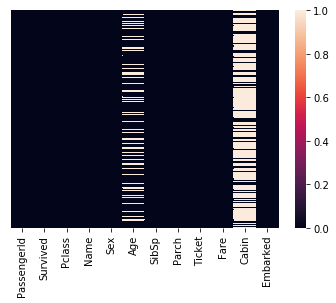

In [51]:
sns.heatmap(Titanic_dataset.isnull(),yticklabels=False)

In [52]:
Titanic_dataset.dropna(inplace=True)

In [53]:
Titanic_dataset.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [54]:
Titanic_dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [55]:
#since data set has many values in string format therefore we neen to convert them to dummy values

In [56]:
#name wasn't a relevant information therefore we dropped that value
Titanic_dataset=Titanic_dataset.drop("Name",axis=1)

In [57]:
Sex=pd.get_dummies(Titanic_dataset['Sex'],drop_first=True)
Sex.head()

,male
1,0
3,0
6,1
10,0
11,0


In [58]:
#let's take a look on the features to decide whether to take them in the dataset to train

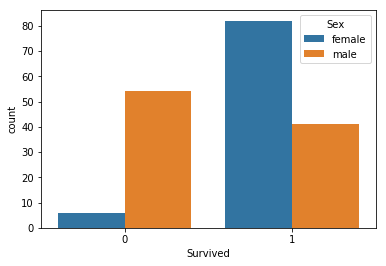

In [59]:
sns.countplot("Survived",hue='Sex',data=Titanic_dataset)

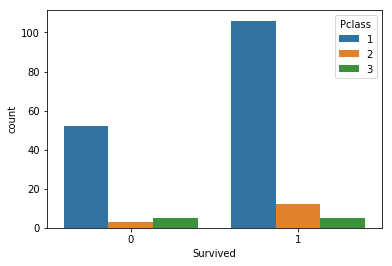

In [60]:
sns.countplot("Survived",hue='Pclass',data=Titanic_dataset)

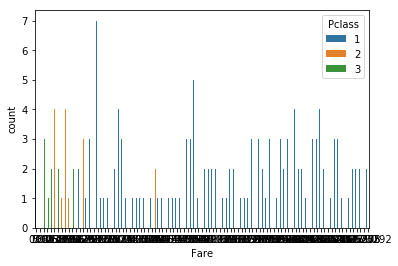

In [61]:
#(from the above graph)this dataset depicts that overall the dataset tells that the 1st class passenger were more
sns.countplot("Fare",hue="Pclass",data=Titanic_dataset)

In [62]:
Titanic_dataset.drop("Ticket",axis=1,inplace=True)

In [63]:
Titanic_dataset.drop("PassengerId",axis=1,inplace=True)

In [64]:
Titanic_dataset.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,female,38.0,1,0,71.2833,C85,C
3,1,1,female,35.0,1,0,53.1000,C123,S
6,0,1,male,54.0,0,0,51.8625,E46,S
10,1,3,female,4.0,1,1,16.7000,G6,S
11,1,1,female,58.0,0,0,26.5500,C103,S


In [65]:
Titanic_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 9 columns):
Survived    183 non-null int64
Pclass      183 non-null int64
Sex         183 non-null object
Age         183 non-null float64
SibSp       183 non-null int64
Parch       183 non-null int64
Fare        183 non-null float64
Cabin       183 non-null object
Embarked    183 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 19.3+ KB


In [66]:
Titanic_dataset["Sex"]=Sex

In [67]:
Emb=pd.get_dummies(Titanic_dataset["Embarked"],drop_first=True)
Emb.head()

,Q,S
1,0,0
3,0,1
6,0,1
10,0,1
11,0,1


In [68]:
Titanic_dataset.drop(["SibSp","Parch","Cabin","Embarked"],axis=1,inplace=True)

In [70]:
Titanic_dataset[['Q','S']]=Emb

In [71]:
Titanic_dataset.head()

,Survived,Pclass,Sex,Age,Fare,Q,S
1,1,1,0,38.0,71.2833,0,0
3,1,1,0,35.0,53.1000,0,1
6,0,1,1,54.0,51.8625,0,1
10,1,3,0,4.0,16.7000,0,1
11,1,1,0,58.0,26.5500,0,1


In [75]:
X=Titanic_dataset.loc[:,"Pclass":"S"]

In [77]:
y=Titanic_dataset.loc[:,"Survived"]

In [73]:
#we split the dataset for training and testing the data
from sklearn.model_selection import train_test_split

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [79]:
#now as the fare is large and we want it to be comparable with the other values
from sklearn.preprocessing import StandardScaler

In [81]:
sc=StandardScaler()

In [83]:
X_train=sc.fit_transform(X_train)

In [85]:
X_test=sc.fit_transform(X_test)

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
lr=LogisticRegression()

In [90]:
lr.fit(X_train,y_train)

C:\Users\ROOPAL\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
y_pred=lr.predict(X_test)

In [93]:
from sklearn.metrics import accuracy_score

In [95]:
accuracy_score(y_test,y_pred)*100

69.56521739130434

In [96]:
from sklearn.metrics import classification_report

In [97]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.53      0.53      0.53        15\n           1       0.77      0.77      0.77        31\n\n   micro avg       0.70      0.70      0.70        46\n   macro avg       0.65      0.65      0.65        46\nweighted avg       0.70      0.70      0.70        46\n'